# 🦜Bird Classification using Deep Convolutional Neural Networks and Transfer Learning

<center><img src='https://media2.giphy.com/media/SvuYYhf9IuL1fEXq4q/200w.webp?cid=ecf05e47xxpr49vt9ioo8yv14ilsi660fz5fimac7c7thctk&rid=200w.webp&ct=s' height=150px width=200px></center>

## 🔬Overview 
Wildlife conservation has been recently transformed by the application of artificial intelligence. AI helps researchers determine the location of animals, date of sighting, migration patterns, and even an animal social group. AI is used by conservationists to monitor and protect animals in their natural habitat.

There are an estimated 30,000 threatened species across the globe. Scientists are utilizing AI to understand what put these species at risk by offering information about where they are born, how many survive, where they go, and how far they go. Following are some advantages of AI in the conservation of animal species:

* AI facilitates the collection of vast and fascinating datasets and their analysis in no time.
* AI is helping wildlife researchers in studying the wild animal species collectively and making strategies to protect them.
* Artificial intelligence tracks wildlife patterns and predicts the extinction of endangered animal species.
* It helps conservationists to detect and stop wildlife poaching.
* It can provide information about the effects of climate change on wildlife and reducing its impact by designing a proper plan.
* AI assists in assessing the species population and see changes.
* It helps to stop illegal animal trade on social media.
* Artificial intelligence identifies and classifies animal species into various classes and provides detailed information about them.
* AI algorithms can conserve animal habitats by predicting animal migratory patterns.
[Source](https://aiworldschool.com/research/this-is-why-ai-in-wildlife-conservation-is-so-glorious/)

## ❗Author's Note:
Make sure to run the cells from top to bottom with a GPU accelerator. There are some linux commands present in some cells so this is important to take into account. Also, any suggestions, comments and recommendations to improve the notebook will be highly appreciated. Cheers!



# 🏗️Import Necessary Libraries

In [49]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# 🤙Create helper functions

In [50]:


# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2022-12-17 07:48:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-12-17 07:48:55 (58.6 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



# 📥Load and Transform Data

In [51]:
BATCH_SIZE = 32
IMAGE_SIZE = (300, 300)

In [52]:
# Walk through each directory
dataset = "../input/train"
walk_through_dir(dataset);

There are 450 directories and 0 images in '../input/100-bird-species/train'.
There are 0 directories and 159 images in '../input/100-bird-species/train/DALMATIAN PELICAN'.
There are 0 directories and 138 images in '../input/100-bird-species/train/WATTLED CURASSOW'.
There are 0 directories and 187 images in '../input/100-bird-species/train/AMERICAN WIGEON'.
There are 0 directories and 162 images in '../input/100-bird-species/train/CARMINE BEE-EATER'.
There are 0 directories and 153 images in '../input/100-bird-species/train/GAMBELS QUAIL'.
There are 0 directories and 155 images in '../input/100-bird-species/train/UMBRELLA BIRD'.
There are 0 directories and 155 images in '../input/100-bird-species/train/AMERICAN KESTREL'.
There are 0 directories and 133 images in '../input/100-bird-species/train/AMERICAN GOLDFINCH'.
There are 0 directories and 139 images in '../input/100-bird-species/train/DUSKY LORY'.
There are 0 directories and 187 images in '../input/100-bird-species/train/AUCKLAND SH

# 📅Placing data into a Dataframe
The first column `filepaths` contains the file path location of each individual images. The second column `labels`, on the other hand, contains the class label of the corresponding image from the file path

In [53]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [54]:
image_df

Filepath              Label
0      ../input/100-bird-species/train/DALMATIAN PELI...  DALMATIAN PELICAN
1      ../input/100-bird-species/train/DALMATIAN PELI...  DALMATIAN PELICAN
2      ../input/100-bird-species/train/DALMATIAN PELI...  DALMATIAN PELICAN
3      ../input/100-bird-species/train/DALMATIAN PELI...  DALMATIAN PELICAN
4      ../input/100-bird-species/train/DALMATIAN PELI...  DALMATIAN PELICAN
...                                                  ...                ...
70621  ../input/100-bird-species/train/GOLDEN EAGLE/0...       GOLDEN EAGLE
70622  ../input/100-bird-species/train/GOLDEN EAGLE/0...       GOLDEN EAGLE
70623  ../input/100-bird-species/train/GOLDEN EAGLE/1...       GOLDEN EAGLE
70624  ../input/100-bird-species/train/GOLDEN EAGLE/0...       GOLDEN EAGLE
70625  ../input/100-bird-species/train/GOLDEN EAGLE/1...       GOLDEN EAGLE

[70626 rows x 2 columns]

# 🔭Visualizing images from the dataset

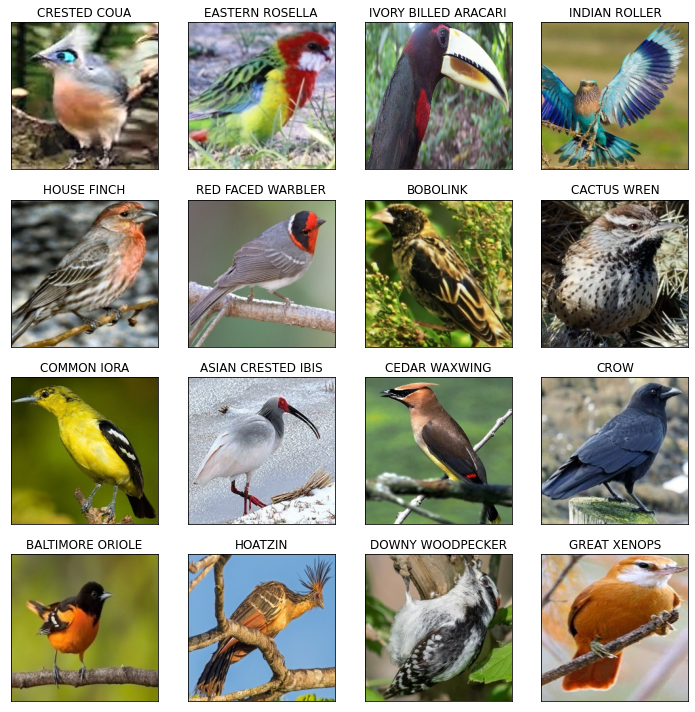

In [55]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

# 📝Data Preprocessing
The data will be split into three different categories: Training, Validation and Testing. The training data will be used to train the deep learning CNN model and its parameters will be fine tuned with the validation data. Finally, the performance of the data will be evaluated using the test data(data the model has not previously seen).

In [56]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [57]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [58]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 45200 validated image filenames belonging to 450 classes.
Found 11300 validated image filenames belonging to 450 classes.
Found 14126 validated image filenames belonging to 450 classes.


In [59]:
# Resize Layer
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# 🤹Training the model
The model images will be subjected to a pre-trained CNN model called MobileNetV2. Three callbacks will be utilized to monitor the training. These are: Model Checkpoint, Early Stopping, Tensorboard callback. The summary of the model hyperparameter is shown as follows:

**Batch size** : 32

**Epochs** : 100

**Input Shape** : (224, 224, 3)

**Output layer** : 400



In [60]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [61]:
# Create checkpoint callback
checkpoint_path = "birds_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [62]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

# 🚄Training the model

In [63]:
inputs = pretrained_model.input
x = resize_and_rescale(inputs)

x = Dense(256, activation='relu')(pretrained_model.output)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)


outputs = Dense(450, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "bird_classification"),
        checkpoint_callback,
    ]
)

2022-12-17 07:49:26.720995: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 07:49:26.721035: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 07:49:26.932538: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 07:49:26.932719: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saving TensorBoard log files to: training_logs/bird_classification/20221217-074926
Epoch 1/100
   2/1413 [..............................] - ETA: 6:30 - loss: 6.2514 - accuracy: 0.0000e+00   

2022-12-17 07:49:30.374330: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 07:49:30.374383: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 07:49:30.878540: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-17 07:49:30.879894: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-12-17 07:49:31.014462: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 312 callback api events and 309 activity events. 
2022-12-17 07:49:31.024810: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 07:49:31.036182: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-074926/train/plugins/profile/2022_12_17_07_49_31

2022-12-17 07:49:31.043671: I tensorflow/core/profiler/rpc/

   4/1413 [..............................] - ETA: 7:15 - loss: 6.2008 - accuracy: 0.0000e+00

2022-12-17 07:49:31.081787: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to training_logs/bird_classification/20221217-074926/train/plugins/profile/2022_12_17_07_49_31/b2b7cbd44fba.memory_profile.json.gz
2022-12-17 07:49:31.083413: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: training_logs/bird_classification/20221217-074926/train/plugins/profile/2022_12_17_07_49_31
Dumped tool data for xplane.pb to training_logs/bird_classification/20221217-074926/train/plugins/profile/2022_12_17_07_49_31/b2b7cbd44fba.xplane.pb
Dumped tool data for overview_page.pb to training_logs/bird_classification/20221217-074926/train/plugins/profile/2022_12_17_07_49_31/b2b7cbd44fba.overview_page.pb
Dumped tool data for input_pipeline.pb to training_logs/bird_classification/20221217-074926/train/plugins/profile/2022_12_17_07_49_31/b2b7cbd44fba.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to trainin

1413/1413 [==============================] - 157s 109ms/step - loss: 4.7188 - accuracy: 0.1251 - val_loss: 2.6275 - val_accuracy: 0.4834
Epoch 2/100
1413/1413 [==============================] - 149s 105ms/step - loss: 2.5394 - accuracy: 0.4013 - val_loss: 1.6188 - val_accuracy: 0.6555
Epoch 3/100
1413/1413 [==============================] - 151s 107ms/step - loss: 1.8848 - accuracy: 0.5250 - val_loss: 1.2512 - val_accuracy: 0.7195
Epoch 4/100
1413/1413 [==============================] - 155s 110ms/step - loss: 1.5530 - accuracy: 0.6004 - val_loss: 1.0612 - val_accuracy: 0.7529
Epoch 5/100
1413/1413 [==============================] - 160s 113ms/step - loss: 1.3357 - accuracy: 0.6513 - val_loss: 0.9529 - val_accuracy: 0.7712
Epoch 6/100
1413/1413 [==============================] - 149s 105ms/step - loss: 1.1771 - accuracy: 0.6881 - val_loss: 0.8695 - val_accuracy: 0.7865
Epoch 7/100
1413/1413 [==============================] - 154s 109ms/step - loss: 1.0558 - accuracy: 0.7174 - val_loss:

KeyboardInterrupt: 

In [71]:
history_2 = model.fit(train_images,
                       epochs = 100,
                       validation_data = val_images,
                       validation_steps = int(0.25*len(val_images)),
                       initial_epoch =  history_2.epoch[-1],
                     callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "bird_classification"),
        checkpoint_callback,
    ])

2022-12-17 10:28:59.686639: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 10:28:59.686696: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 10:28:59.822039: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 10:28:59.822238: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Saving TensorBoard log files to: training_logs/bird_classification/20221217-102859
Epoch 50/100
   2/1413 [..............................] - ETA: 6:17 - loss: 0.1893 - accuracy: 0.9531

2022-12-17 10:29:00.335992: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 10:29:00.336058: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 10:29:00.528007: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-17 10:29:00.528685: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


   4/1413 [..............................] - ETA: 4:33 - loss: 0.2125 - accuracy: 0.9453

2022-12-17 10:29:00.661836: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 312 callback api events and 309 activity events. 
2022-12-17 10:29:00.670563: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 10:29:00.679433: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-102859/train/plugins/profile/2022_12_17_10_29_00

2022-12-17 10:29:00.686965: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to training_logs/bird_classification/20221217-102859/train/plugins/profile/2022_12_17_10_29_00/b2b7cbd44fba.trace.json.gz
2022-12-17 10:29:00.711793: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-102859/train/plugins/profile/2022_12_17_10_29_00

2022-12-17 10:29:00.717845: I tensorflow/core/profiler/rpc/client/sav

1413/1413 [==============================] - 154s 109ms/step - loss: 0.2016 - accuracy: 0.9377 - val_loss: 0.5946 - val_accuracy: 0.8519
Epoch 51/100
1413/1413 [==============================] - 155s 110ms/step - loss: 0.1933 - accuracy: 0.9407 - val_loss: 0.5878 - val_accuracy: 0.8557
Epoch 52/100
1413/1413 [==============================] - 149s 105ms/step - loss: 0.1869 - accuracy: 0.9426 - val_loss: 0.5885 - val_accuracy: 0.8540
Epoch 53/100
1413/1413 [==============================] - 154s 109ms/step - loss: 0.1790 - accuracy: 0.9458 - val_loss: 0.5932 - val_accuracy: 0.8549
Epoch 54/100
1413/1413 [==============================] - 148s 105ms/step - loss: 0.1750 - accuracy: 0.9470 - val_loss: 0.5945 - val_accuracy: 0.8534
Epoch 55/100
1413/1413 [==============================] - 149s 106ms/step - loss: 0.1676 - accuracy: 0.9494 - val_loss: 0.6031 - val_accuracy: 0.8533
Epoch 56/100
1413/1413 [==============================] - 146s 104ms/step - loss: 0.1671 - accuracy: 0.9479 - val

In [72]:
history_2 = model.fit(train_images,
                       epochs = 100,
                       validation_data = val_images,
                       validation_steps = int(0.25*len(val_images)),
                       initial_epoch =  history_2.epoch[-1],
                     callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "bird_classification"),
        checkpoint_callback,
    ])

2022-12-17 11:10:21.060346: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 11:10:21.060405: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 11:10:21.196930: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 11:10:21.197127: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Saving TensorBoard log files to: training_logs/bird_classification/20221217-111021
Epoch 56/100
   2/1413 [..............................] - ETA: 6:20 - loss: 0.1115 - accuracy: 0.9531

2022-12-17 11:10:21.730612: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 11:10:21.730665: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 11:10:21.926506: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-17 11:10:21.927157: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


   4/1413 [..............................] - ETA: 4:35 - loss: 0.1157 - accuracy: 0.9609

2022-12-17 11:10:22.059974: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 312 callback api events and 309 activity events. 
2022-12-17 11:10:22.068347: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 11:10:22.077166: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-111021/train/plugins/profile/2022_12_17_11_10_22

2022-12-17 11:10:22.084606: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to training_logs/bird_classification/20221217-111021/train/plugins/profile/2022_12_17_11_10_22/b2b7cbd44fba.trace.json.gz
2022-12-17 11:10:22.109346: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-111021/train/plugins/profile/2022_12_17_11_10_22

2022-12-17 11:10:22.115365: I tensorflow/core/profiler/rpc/client/sav

1413/1413 [==============================] - 138s 97ms/step - loss: 0.1882 - accuracy: 0.9420 - val_loss: 0.5973 - val_accuracy: 0.8537
Epoch 57/100
1413/1413 [==============================] - 129s 91ms/step - loss: 0.1799 - accuracy: 0.9446 - val_loss: 0.5960 - val_accuracy: 0.8509
Epoch 58/100
1413/1413 [==============================] - 134s 95ms/step - loss: 0.1712 - accuracy: 0.9482 - val_loss: 0.5031 - val_accuracy: 0.8746
Epoch 59/100
1413/1413 [==============================] - 130s 92ms/step - loss: 0.1715 - accuracy: 0.9473 - val_loss: 0.6250 - val_accuracy: 0.8540
Epoch 60/100
1413/1413 [==============================] - 132s 93ms/step - loss: 0.1628 - accuracy: 0.9507 - val_loss: 0.6777 - val_accuracy: 0.8452
Epoch 61/100
1413/1413 [==============================] - 129s 91ms/step - loss: 0.1571 - accuracy: 0.9523 - val_loss: 0.6242 - val_accuracy: 0.8555
Epoch 62/100
1413/1413 [==============================] - 131s 93ms/step - loss: 0.1551 - accuracy: 0.9527 - val_loss: 

In [73]:
history_2 = model.fit(train_images,
                       epochs = 100,
                       validation_data = val_images,
                       validation_steps = int(0.25*len(val_images)),
                       initial_epoch =  history_2.epoch[-1],
                     callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "bird_classification"),
        checkpoint_callback,
    ])

2022-12-17 11:40:28.857374: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 11:40:28.857435: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 11:40:28.994278: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 11:40:28.994513: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Saving TensorBoard log files to: training_logs/bird_classification/20221217-114028
Epoch 63/100
   2/1413 [..............................] - ETA: 6:28 - loss: 0.1502 - accuracy: 0.9688

2022-12-17 11:40:29.536002: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 11:40:29.536045: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 11:40:29.733381: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-17 11:40:29.734043: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


   4/1413 [..............................] - ETA: 4:44 - loss: 0.1539 - accuracy: 0.9453

2022-12-17 11:40:29.869111: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 312 callback api events and 309 activity events. 
2022-12-17 11:40:29.878115: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 11:40:29.887248: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-114028/train/plugins/profile/2022_12_17_11_40_29

2022-12-17 11:40:29.894744: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to training_logs/bird_classification/20221217-114028/train/plugins/profile/2022_12_17_11_40_29/b2b7cbd44fba.trace.json.gz
2022-12-17 11:40:29.921064: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-114028/train/plugins/profile/2022_12_17_11_40_29

2022-12-17 11:40:29.927146: I tensorflow/core/profiler/rpc/client/sav

1413/1413 [==============================] - 130s 92ms/step - loss: 0.1696 - accuracy: 0.9477 - val_loss: 0.5668 - val_accuracy: 0.8562
Epoch 64/100
1413/1413 [==============================] - 128s 90ms/step - loss: 0.1683 - accuracy: 0.9482 - val_loss: 0.5774 - val_accuracy: 0.8587
Epoch 65/100
1413/1413 [==============================] - 133s 94ms/step - loss: 0.1586 - accuracy: 0.9507 - val_loss: 0.5938 - val_accuracy: 0.8544
Epoch 66/100
1413/1413 [==============================] - 127s 90ms/step - loss: 0.1544 - accuracy: 0.9544 - val_loss: 0.6077 - val_accuracy: 0.8477
Epoch 67/100
1413/1413 [==============================] - 126s 90ms/step - loss: 0.1537 - accuracy: 0.9532 - val_loss: 0.5760 - val_accuracy: 0.8587
Epoch 68/100
1413/1413 [==============================] - 134s 94ms/step - loss: 0.1463 - accuracy: 0.9553 - val_loss: 0.5993 - val_accuracy: 0.8661


In [74]:
history_2 = model.fit(train_images,
                       epochs = 100,
                       validation_data = val_images,
                       validation_steps = int(0.25*len(val_images)),
                       initial_epoch =  history_2.epoch[-1],
                     callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "bird_classification"),
        checkpoint_callback,
    ])

2022-12-17 12:12:39.028814: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 12:12:39.028870: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Saving TensorBoard log files to: training_logs/bird_classification/20221217-121239


2022-12-17 12:12:39.167386: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 12:12:39.167577: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 68/100
   2/1413 [..............................] - ETA: 6:21 - loss: 0.1795 - accuracy: 0.9375

2022-12-17 12:12:58.969020: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 12:12:58.969071: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 12:12:59.162726: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-17 12:12:59.163396: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


   4/1413 [..............................] - ETA: 4:37 - loss: 0.1796 - accuracy: 0.9297

2022-12-17 12:12:59.295992: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 312 callback api events and 309 activity events. 
2022-12-17 12:12:59.304726: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 12:12:59.313821: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-121239/train/plugins/profile/2022_12_17_12_12_59

2022-12-17 12:12:59.321499: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to training_logs/bird_classification/20221217-121239/train/plugins/profile/2022_12_17_12_12_59/b2b7cbd44fba.trace.json.gz
2022-12-17 12:12:59.347482: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-121239/train/plugins/profile/2022_12_17_12_12_59

2022-12-17 12:12:59.353771: I tensorflow/core/profiler/rpc/client/sav

1413/1413 [==============================] - 132s 94ms/step - loss: 0.1671 - accuracy: 0.9480 - val_loss: 0.6263 - val_accuracy: 0.8480
Epoch 69/100
1413/1413 [==============================] - 131s 93ms/step - loss: 0.1626 - accuracy: 0.9491 - val_loss: 0.6301 - val_accuracy: 0.8466
Epoch 70/100
1413/1413 [==============================] - 133s 94ms/step - loss: 0.1543 - accuracy: 0.9514 - val_loss: 0.5625 - val_accuracy: 0.8626
Epoch 71/100
1413/1413 [==============================] - 130s 92ms/step - loss: 0.1526 - accuracy: 0.9527 - val_loss: 0.5475 - val_accuracy: 0.8640
Epoch 72/100
1413/1413 [==============================] - 132s 93ms/step - loss: 0.1489 - accuracy: 0.9545 - val_loss: 0.5792 - val_accuracy: 0.8519
Epoch 73/100
1413/1413 [==============================] - 132s 93ms/step - loss: 0.1384 - accuracy: 0.9577 - val_loss: 0.6552 - val_accuracy: 0.8494
Epoch 74/100
1413/1413 [==============================] - 133s 94ms/step - loss: 0.1388 - accuracy: 0.9569 - val_loss: 

In [75]:
history_2 = model.fit(train_images,
                       epochs = 100,
                       validation_data = val_images,
                       validation_steps = int(0.25*len(val_images)),
                       initial_epoch =  history_2.epoch[-1],
                     callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "bird_classification"),
        checkpoint_callback,
    ])

2022-12-17 12:40:38.946807: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 12:40:38.946860: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


Saving TensorBoard log files to: training_logs/bird_classification/20221217-124038
Epoch 76/100


2022-12-17 12:40:39.081663: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 12:40:39.081849: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


   2/1413 [..............................] - ETA: 6:15 - loss: 0.1370 - accuracy: 0.9531

2022-12-17 12:40:39.606396: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 12:40:39.606466: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 12:40:39.798910: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-17 12:40:39.801424: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


   4/1413 [..............................] - ETA: 4:38 - loss: 0.1133 - accuracy: 0.9688

2022-12-17 12:40:39.941993: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 312 callback api events and 309 activity events. 
2022-12-17 12:40:39.950288: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 12:40:39.959458: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-124038/train/plugins/profile/2022_12_17_12_40_39

2022-12-17 12:40:39.967127: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to training_logs/bird_classification/20221217-124038/train/plugins/profile/2022_12_17_12_40_39/b2b7cbd44fba.trace.json.gz
2022-12-17 12:40:39.992625: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-124038/train/plugins/profile/2022_12_17_12_40_39

2022-12-17 12:40:39.998717: I tensorflow/core/profiler/rpc/client/sav

1413/1413 [==============================] - 131s 93ms/step - loss: 0.1461 - accuracy: 0.9548 - val_loss: 0.6201 - val_accuracy: 0.8501
Epoch 77/100
1413/1413 [==============================] - 128s 91ms/step - loss: 0.1415 - accuracy: 0.9569 - val_loss: 0.6141 - val_accuracy: 0.8494
Epoch 78/100
1413/1413 [==============================] - 136s 96ms/step - loss: 0.1384 - accuracy: 0.9579 - val_loss: 0.6161 - val_accuracy: 0.8572
Epoch 79/100
1413/1413 [==============================] - 136s 96ms/step - loss: 0.1325 - accuracy: 0.9590 - val_loss: 0.6296 - val_accuracy: 0.8537
Epoch 80/100
1413/1413 [==============================] - 128s 91ms/step - loss: 0.1294 - accuracy: 0.9610 - val_loss: 0.6226 - val_accuracy: 0.8580
Epoch 81/100
1413/1413 [==============================] - 133s 94ms/step - loss: 0.1273 - accuracy: 0.9609 - val_loss: 0.6694 - val_accuracy: 0.8480
Epoch 82/100
1413/1413 [==============================] - 130s 92ms/step - loss: 0.1253 - accuracy: 0.9609 - val_loss: 

In [76]:
history_2 = model.fit(train_images,
                       epochs = 100,
                       validation_data = val_images,
                       validation_steps = int(0.25*len(val_images)),
                       initial_epoch =  history_2.epoch[-1],
                     callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "bird_classification"),
        checkpoint_callback,
    ])

2022-12-17 13:18:04.064491: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 13:18:04.064560: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 13:18:04.221729: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 13:18:04.221914: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Saving TensorBoard log files to: training_logs/bird_classification/20221217-131804
Epoch 82/100
   2/1413 [..............................] - ETA: 6:23 - loss: 0.1053 - accuracy: 0.9531

2022-12-17 13:18:04.763777: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 13:18:04.764118: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 13:18:04.958095: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-17 13:18:04.958721: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


   4/1413 [..............................] - ETA: 4:36 - loss: 0.1159 - accuracy: 0.9609

2022-12-17 13:18:05.090987: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 312 callback api events and 309 activity events. 
2022-12-17 13:18:05.099344: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 13:18:05.107904: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-131804/train/plugins/profile/2022_12_17_13_18_05

2022-12-17 13:18:05.115655: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to training_logs/bird_classification/20221217-131804/train/plugins/profile/2022_12_17_13_18_05/b2b7cbd44fba.trace.json.gz
2022-12-17 13:18:05.140818: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-131804/train/plugins/profile/2022_12_17_13_18_05

2022-12-17 13:18:05.147895: I tensorflow/core/profiler/rpc/client/sav

1413/1413 [==============================] - 129s 91ms/step - loss: 0.1412 - accuracy: 0.9566 - val_loss: 0.6262 - val_accuracy: 0.8519
Epoch 83/100
1413/1413 [==============================] - 134s 95ms/step - loss: 0.1366 - accuracy: 0.9575 - val_loss: 0.6019 - val_accuracy: 0.8548
Epoch 84/100
1413/1413 [==============================] - 135s 96ms/step - loss: 0.1304 - accuracy: 0.9590 - val_loss: 0.6342 - val_accuracy: 0.8548
Epoch 85/100
1413/1413 [==============================] - 131s 93ms/step - loss: 0.1281 - accuracy: 0.9607 - val_loss: 0.6064 - val_accuracy: 0.8612
Epoch 86/100
1413/1413 [==============================] - 133s 94ms/step - loss: 0.1257 - accuracy: 0.9614 - val_loss: 0.6240 - val_accuracy: 0.8548
Epoch 87/100
1413/1413 [==============================] - 127s 90ms/step - loss: 0.1196 - accuracy: 0.9632 - val_loss: 0.6106 - val_accuracy: 0.8636
Epoch 88/100
1413/1413 [==============================] - 130s 92ms/step - loss: 0.1166 - accuracy: 0.9641 - val_loss: 

In [77]:
history_2 = model.fit(train_images,
                       epochs = 100,
                       validation_data = val_images,
                       validation_steps = int(0.25*len(val_images)),
                       initial_epoch =  history_2.epoch[-1],
                     callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "bird_classification"),
        checkpoint_callback,
    ])

2022-12-17 13:42:12.468953: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 13:42:12.469025: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 13:42:12.605195: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 13:42:12.605406: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Saving TensorBoard log files to: training_logs/bird_classification/20221217-134212
Epoch 88/100
   2/1413 [..............................] - ETA: 6:15 - loss: 0.0940 - accuracy: 0.9844

2022-12-17 13:42:13.147919: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 13:42:13.147989: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 13:42:13.342977: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-17 13:42:13.343662: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


   3/1413 [..............................] - ETA: 5:50 - loss: 0.0851 - accuracy: 0.9792

2022-12-17 13:42:13.476170: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 312 callback api events and 309 activity events. 
2022-12-17 13:42:13.484715: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 13:42:13.493745: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-134212/train/plugins/profile/2022_12_17_13_42_13

2022-12-17 13:42:13.501254: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to training_logs/bird_classification/20221217-134212/train/plugins/profile/2022_12_17_13_42_13/b2b7cbd44fba.trace.json.gz
2022-12-17 13:42:13.526856: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-134212/train/plugins/profile/2022_12_17_13_42_13

2022-12-17 13:42:13.532858: I tensorflow/core/profiler/rpc/client/sav

1413/1413 [==============================] - 136s 96ms/step - loss: 0.1338 - accuracy: 0.9584 - val_loss: 0.6451 - val_accuracy: 0.8487
Epoch 89/100
1413/1413 [==============================] - 135s 95ms/step - loss: 0.1291 - accuracy: 0.9600 - val_loss: 0.5872 - val_accuracy: 0.8572
Epoch 90/100
1413/1413 [==============================] - 129s 91ms/step - loss: 0.1242 - accuracy: 0.9613 - val_loss: 0.6466 - val_accuracy: 0.8519
Epoch 91/100
1413/1413 [==============================] - 132s 93ms/step - loss: 0.1195 - accuracy: 0.9636 - val_loss: 0.6615 - val_accuracy: 0.8480
Epoch 92/100
1413/1413 [==============================] - 130s 92ms/step - loss: 0.1186 - accuracy: 0.9635 - val_loss: 0.6327 - val_accuracy: 0.8544
Epoch 93/100
1413/1413 [==============================] - 131s 92ms/step - loss: 0.1156 - accuracy: 0.9654 - val_loss: 0.6883 - val_accuracy: 0.8480
Epoch 94/100
1413/1413 [==============================] - 125s 88ms/step - loss: 0.1138 - accuracy: 0.9643 - val_loss: 

In [78]:
history_2 = model.fit(train_images,
                       epochs = 100,
                       validation_data = val_images,
                       validation_steps = int(0.25*len(val_images)),
                       initial_epoch =  history_2.epoch[-1],
                     callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "bird_classification"),
        checkpoint_callback,
    ])

2022-12-17 14:20:59.875641: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 14:20:59.875695: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 14:21:00.010783: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Saving TensorBoard log files to: training_logs/bird_classification/20221217-142059


2022-12-17 14:21:00.010957: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 94/100
   2/1413 [..............................] - ETA: 6:19 - loss: 0.2336 - accuracy: 0.9531

2022-12-17 14:21:00.561288: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-17 14:21:00.561540: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-17 14:21:00.757591: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-17 14:21:00.758190: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


   4/1413 [..............................] - ETA: 4:40 - loss: 0.1672 - accuracy: 0.9766

2022-12-17 14:21:00.891133: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 312 callback api events and 309 activity events. 
2022-12-17 14:21:00.899526: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-17 14:21:00.908789: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-142059/train/plugins/profile/2022_12_17_14_21_00

2022-12-17 14:21:00.916322: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to training_logs/bird_classification/20221217-142059/train/plugins/profile/2022_12_17_14_21_00/b2b7cbd44fba.trace.json.gz
2022-12-17 14:21:00.942132: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: training_logs/bird_classification/20221217-142059/train/plugins/profile/2022_12_17_14_21_00

2022-12-17 14:21:00.948559: I tensorflow/core/profiler/rpc/client/sav

1413/1413 [==============================] - 128s 91ms/step - loss: 0.1257 - accuracy: 0.9612 - val_loss: 0.6436 - val_accuracy: 0.8430
Epoch 95/100
1413/1413 [==============================] - 131s 93ms/step - loss: 0.1175 - accuracy: 0.9642 - val_loss: 0.6064 - val_accuracy: 0.8551
Epoch 96/100
1413/1413 [==============================] - 137s 97ms/step - loss: 0.1188 - accuracy: 0.9630 - val_loss: 0.6028 - val_accuracy: 0.8587
Epoch 97/100
1413/1413 [==============================] - 130s 92ms/step - loss: 0.1166 - accuracy: 0.9641 - val_loss: 0.6664 - val_accuracy: 0.8459
Epoch 98/100
1413/1413 [==============================] - 129s 91ms/step - loss: 0.1134 - accuracy: 0.9655 - val_loss: 0.5856 - val_accuracy: 0.8597
Epoch 99/100
1413/1413 [==============================] - 126s 89ms/step - loss: 0.1107 - accuracy: 0.9653 - val_loss: 0.6504 - val_accuracy: 0.8491
Epoch 100/100
1413/1413 [==============================] - 134s 95ms/step - loss: 0.1091 - accuracy: 0.9663 - val_loss:

## Saving the model

In [79]:
model.save('model.h5')

## Model Architecture

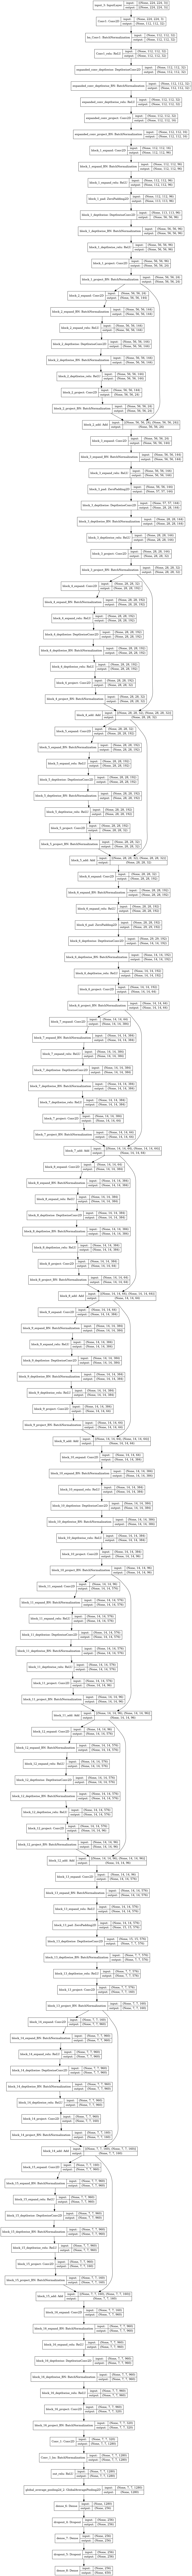

In [86]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# ✔️Model Evaluation
The test dataset will be used to evaluate the performance of the model.One of the metrics that will be tested would be accuracy which measures the fraction of predictions the model got right. Other metrics are as follows:

**Precision(P)**: 
The fraction of true positives (TP, correct predictions) from the total amount of relevant results, i.e., the sum of TP and false positives (FP). For multi-class classification problems, P is averaged among the classes. The following is the formula for precision.

<center>$P=TP/(TP+FP)$</center>

**Recall(R)**: 
The fraction of TP from the total amount of TP and false negatives (FN). For multi-class classification problems, R gets averaged among all the classes. The following is the formula for recall.
<center>$R=TP/(TP+FN)$</center>

**F1 score(F1)**: 
The harmonic mean of precision and recall. For multi-class classification problems, F1 gets averaged among all the classes. The following is the formula for F1 score.
<center>$F1=2 * (TP * FP)/(TP+FP)$</center>



In [92]:
results = model.evaluate(test_images)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

442/442 [==============================] - 39s 87ms/step - loss: 0.6506 - accuracy: 0.8493
    Test Loss: 0.65063
Test Accuracy: 84.93%


# 📉Visualizing loss curves

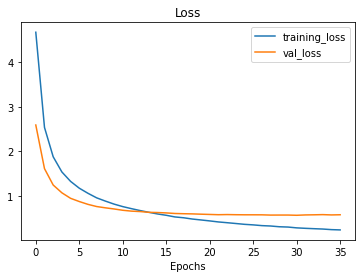

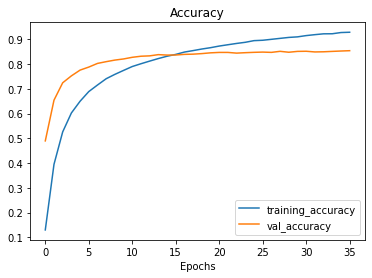

In [83]:
plot_loss_curves(history)

# 🔮Making predictions on the Test Data

In [87]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['TOWNSENDS WARBLER', 'PATAGONIAN SIERRA FINCH', 'CRIMSON SUNBIRD', 'CREAM COLORED WOODPECKER', 'GURNEYS PITTA']


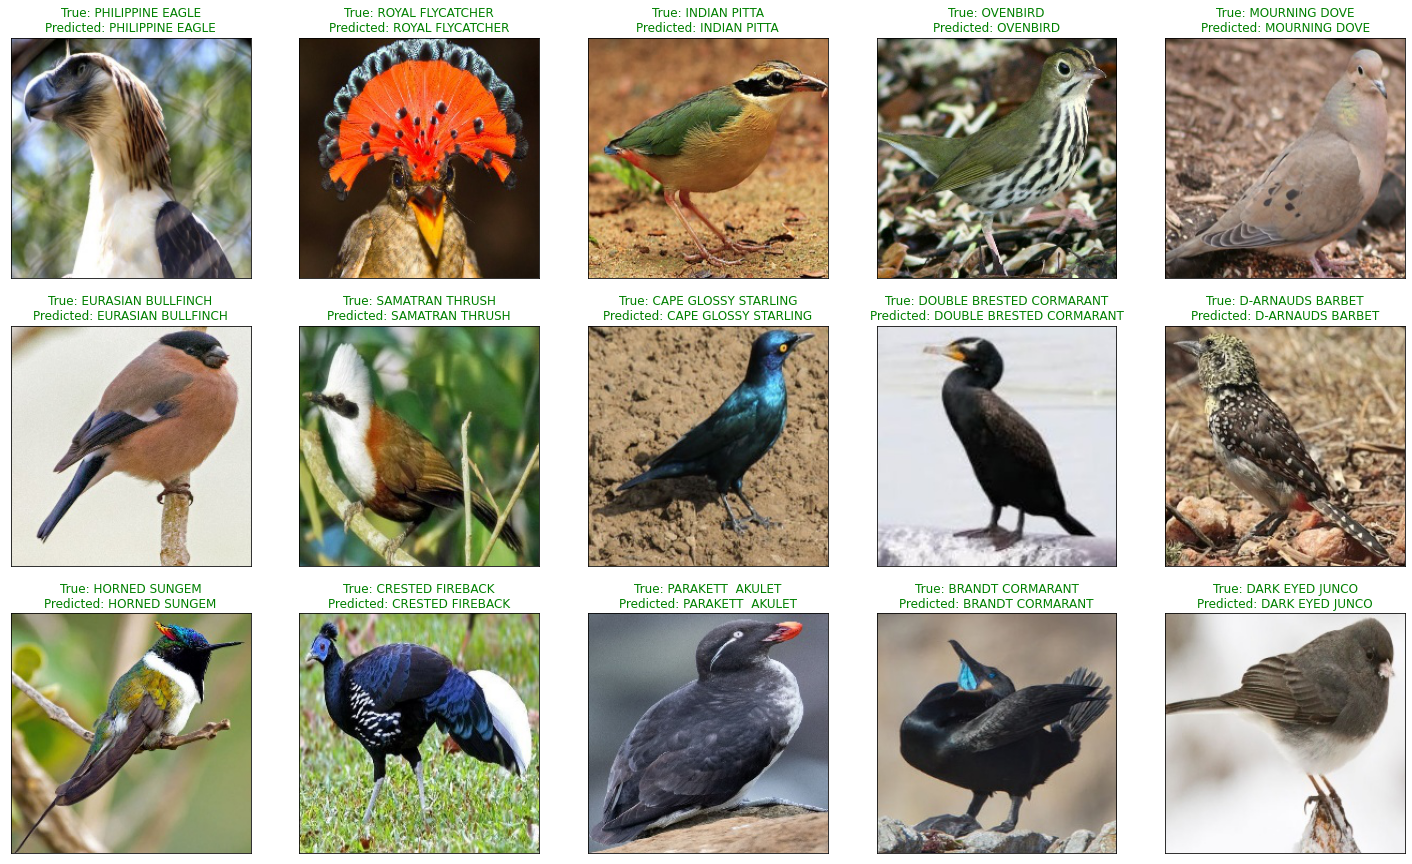

<Figure size 432x288 with 0 Axes>

In [95]:
  # Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

# 📊Plotting the Classification Reports and Confusion Matrix

In [89]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       0.63      0.81      0.71        27
                ABBOTTS BOOBY       0.87      0.61      0.71        33
   ABYSSINIAN GROUND HORNBILL       0.94      0.86      0.90        35
        AFRICAN CROWNED CRANE       0.97      1.00      0.98        32
       AFRICAN EMERALD CUCKOO       0.82      0.78      0.80        23
            AFRICAN FIREFINCH       0.74      0.81      0.77        21
       AFRICAN OYSTER CATCHER       0.97      0.94      0.95        31
        AFRICAN PIED HORNBILL       0.83      0.75      0.79        40
                    ALBATROSS       0.79      0.79      0.79        28
               ALBERTS TOWHEE       0.84      0.93      0.88        28
         ALEXANDRINE PARAKEET       0.89      0.96      0.93        26
                ALPINE CHOUGH       0.76      0.89      0.82        36
        ALTAMIRA YELLOWTHROAT       0.74      0.86      0.79        36
     

In [90]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score       support
ABBOTTS BABBLER              0.628571  0.814815  0.709677     27.000000
ABBOTTS BOOBY                0.869565  0.606061  0.714286     33.000000
ABYSSINIAN GROUND HORNBILL   0.937500  0.857143  0.895522     35.000000
AFRICAN CROWNED CRANE        0.969697  1.000000  0.984615     32.000000
AFRICAN EMERALD CUCKOO       0.818182  0.782609  0.800000     23.000000
...                               ...       ...       ...           ...
YELLOW CACIQUE               0.923077  0.774194  0.842105     31.000000
YELLOW HEADED BLACKBIRD      0.891892  0.942857  0.916667     35.000000
accuracy                     0.849285  0.849285  0.849285      0.849285
macro avg                    0.851705  0.850049  0.847199  14126.000000
weighted avg                 0.855926  0.849285  0.849115  14126.000000

[453 rows x 4 columns]